In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['Tişört/Üst', 'Pantolon', 'Kazak', 'Elbise', 'Ceket',
               'Sandalet', 'Gömlek', 'Sneaker', 'Çanta', 'Bilekte Bot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

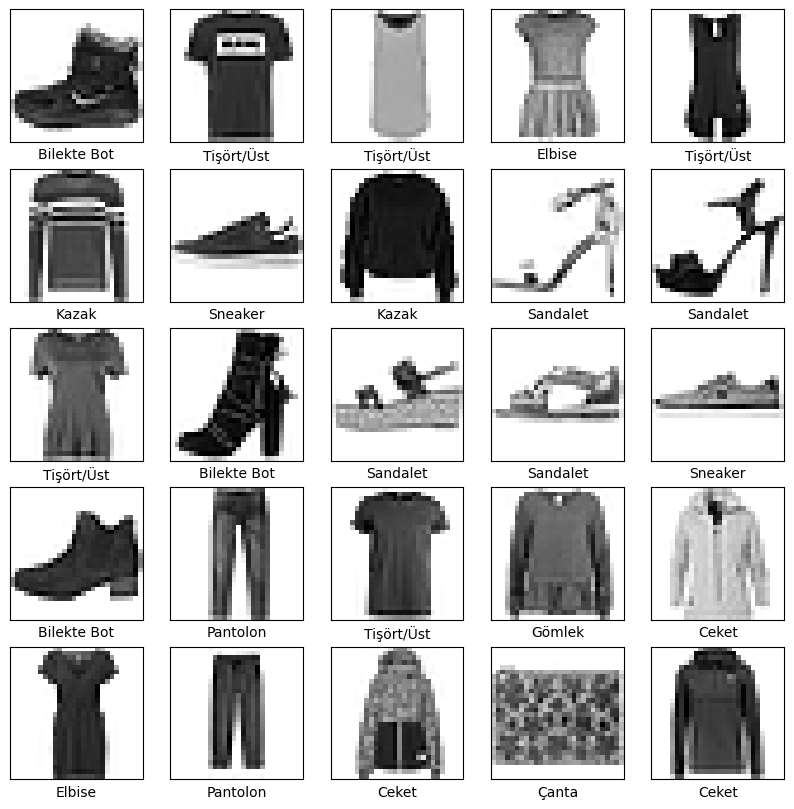

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [10]:
import numpy as np

class_distribution_train = np.bincount(train_labels)
class_distribution_test = np.bincount(test_labels)

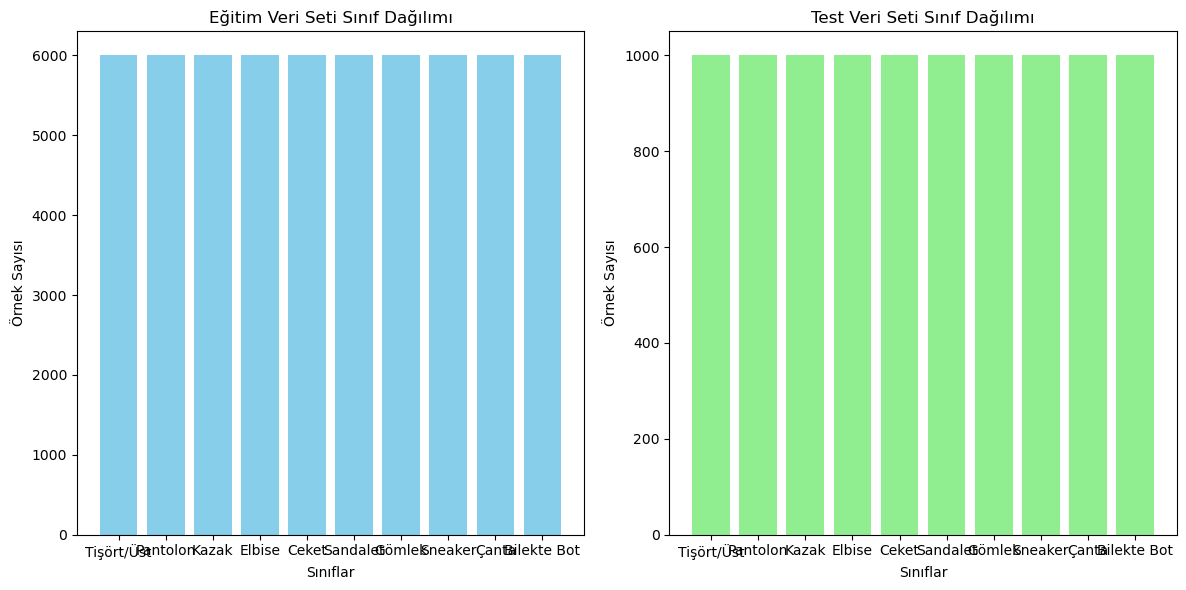

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(class_names, class_distribution_train, color='skyblue')
plt.title('Eğitim Veri Seti Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')

plt.subplot(1, 2, 2)
plt.bar(class_names, class_distribution_test, color='lightgreen')
plt.title('Test Veri Seti Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')

plt.tight_layout()
plt.show()

In [12]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10)
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7495 - loss: 0.7177 - val_accuracy: 0.8461 - val_loss: 0.4169
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8542 - loss: 0.4052 - val_accuracy: 0.8602 - val_loss: 0.3862
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8687 - loss: 0.3575 - val_accuracy: 0.8685 - val_loss: 0.3783
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3363 - val_accuracy: 0.8666 - val_loss: 0.3720
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8859 - loss: 0.3143 - val_accuracy: 0.8679 - val_loss: 0.3675
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8902 - loss: 0.2970 - val_accuracy: 0.8724 - val_loss: 0.3586
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8930 - loss: 0.2874 - val_accuracy: 0.8736 - val_loss: 0.3568
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8973 - loss: 0.2773 - 

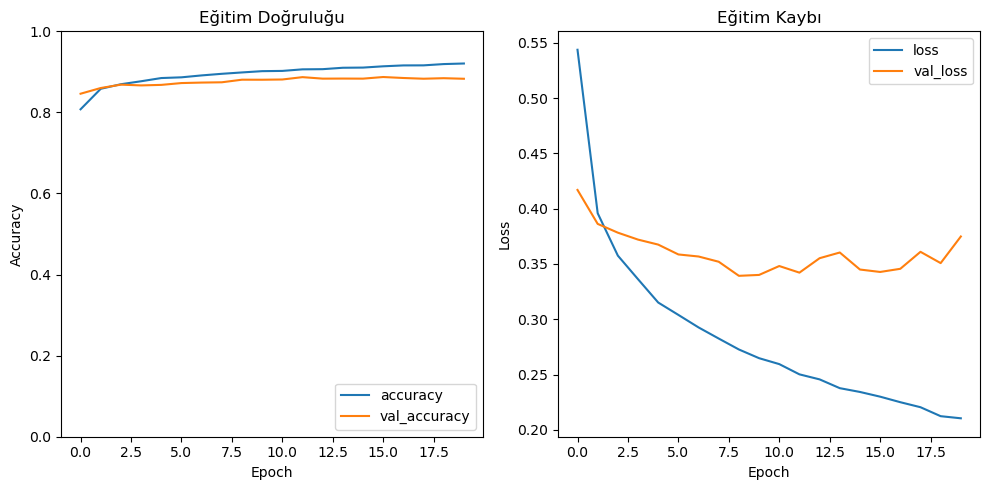

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Eğitim Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Eğitim Kaybı')

plt.tight_layout()
plt.show()

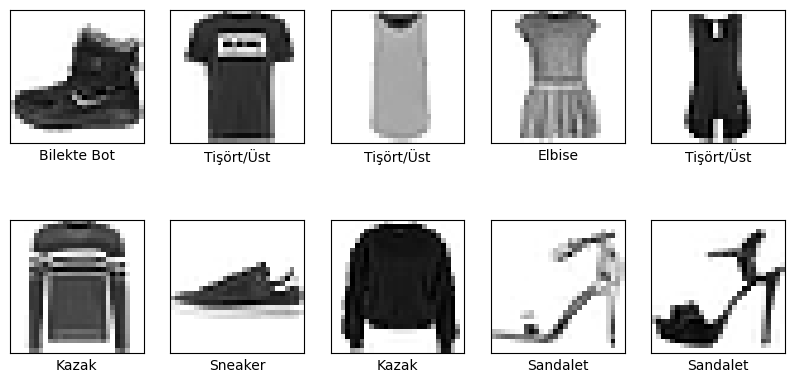

In [16]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


              precision    recall  f1-score   support

  Tişört/Üst       0.89      0.75      0.81      1000
    Pantolon       0.99      0.97      0.98      1000
       Kazak       0.84      0.76      0.80      1000
      Elbise       0.87      0.92      0.90      1000
       Ceket       0.77      0.83      0.80      1000
    Sandalet       0.94      0.98      0.96      1000
      Gömlek       0.67      0.76      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
       Çanta       0.97      0.97      0.97      1000
 Bilekte Bot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



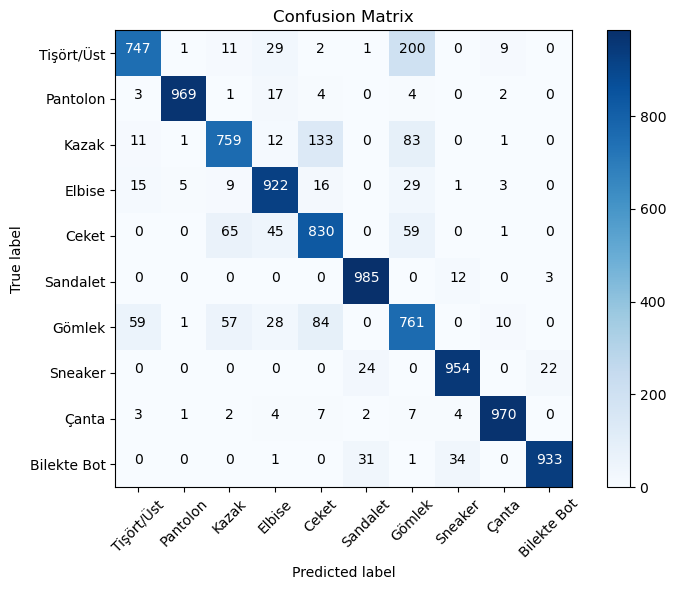

In [20]:
import itertools

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

print(classification_report(test_labels, predicted_labels, target_names=class_names))

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8830 - loss: 0.3748

Test accuracy: 0.8830000162124634
